# 4. Training Classifier

In [81]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [82]:
# Dataframe
path_df = "Data/df.csv"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.csv"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.csv"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.csv"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.csv"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [83]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [84]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [85]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.
choice = 2

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Multinomial Naive Bayes:

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [86]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    random_grid = {'alpha' : [float(x) for x in np.linspace(start = 0.1, stop = 2.0, num = 10)],
                   'fit_prior' : [True, False], 
    }
elif choice==3:
    random_grid = {'n_neighbors': [int(x) for x in np.linspace(start= 5, stop = 15, num = 10)],
                   'weights': ['uniform', 'distance'],
                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size' : [30,40,50,60],
                   'p' : [1,2],
                   'metric' : ['euclidean', ',manhattan', 'minkowski','chebyshev']
                  }
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.001, .01, .1, 1, 10],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'alpha': [0.1,
           0.3111111111111111,
           0.5222222222222223,
           0.7333333333333333,
           0.9444444444444444,
           1.1555555555555557,
           1.3666666666666667,
           1.577777777777778,
           1.788888888888889,
           2.0],
 'fit_prior': [True, False]}


In [87]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': [0.1, 0.3111111111111111,
                                                  0.5222222222222223,
                                                  0.7333333333333333,
                                                  0.9444444444444444,
                                                  1.1555555555555557,
                                                  1.3666666666666667,
                                                  1.577777777777778,
                                                  1.788888888888889, 2.0],
                                        'fit_prior': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=8, refit=True,
                   return_train_score=False, scoring='a

In [88]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'fit_prior': False, 'alpha': 0.7333333333333333}

The mean accuracy of a model with these hyperparameters is:
0.9444754693566105


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [53]:
# Cross Validation with Logistic Regression
# Create the parameter grid based on the results of random search
param_grid = {'C': [float(x) for x in np.linspace(start = 0.6, stop = 1.5, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['sag'],
               'class_weight': ['balanced']}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [54]:
# Grid search for Logistic Regression
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                               1.3, 1.4, 1.5],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'solver': ['sag']},
          

In [36]:
# Cross Validation with K-Nearest Neighbour
# Create the parameter grid based on the results of random search 
param_grid = {'n_neighbors': [int(x) for x in np.linspace(start= 10, stop = 15, num = 5)],
                   'weights': ['distance'],
                   'algorithm' : ['kd_tree'],
                   'leaf_size' : [int(x) for x in np.linspace(start= 50, stop = 80, num = 5)],
                   'p' : [2],
                   'metric' : ['minkowski']
                  }
    
# Create a base model
classifier = KNeighborsClassifier()

In [37]:
# Grid search for K-Nearest Neighbour
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=None, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['kd_tree'],
                         'leaf_size': [50, 57, 65, 72, 80],
                         'metric': ['minkowski'],
                         'n_neighbors': [10, 11, 12, 13, 15], 'p': [2],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [89]:
# Cross Validation with MultinomialNB
# Create the parameter grid based on the results of random search
param_grid = {'alpha' : [float(x) for x in np.linspace(start = 0.73, stop = 1.5, num = 10)],
            'fit_prior' : [True, False]
             }

# Create a base model
classifier = MultinomialNB()

In [90]:
# Grid search for MultinomialNB
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=None, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.73, 0.8155555555555556, 0.9011111111111111,
                                   0.9866666666666666, 1.0722222222222222,
                                   1.1577777777777778, 1.2433333333333332,
                                   1.3288888888888888, 1.4144444444444444,
                                   1.5],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [91]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'alpha': 0.8155555555555556, 'fit_prior': True}

The mean accuracy of a model with these hyperparameters is:
0.9466666666666667


In [92]:
best_classifier = grid_search.best_estimator_

best_classifier

MultinomialNB(alpha=0.8155555555555556, class_prior=None, fit_prior=True)

### Model fit and performance

In [93]:
best_classifier.fit(features_train, labels_train)

MultinomialNB(alpha=0.8155555555555556, class_prior=None, fit_prior=True)

In [94]:
classifier_pred = best_classifier.predict(features_test)

In [ ]:
# Table for Logistic Regression Accuracy
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

In [43]:
# Table for KNN Accuracy
d = {
     'Model': 'K-Nearest Neighbour',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,K-Nearest Neighbour,1.0,0.931138


In [95]:
# Table for MultinomialNB Accuracy
d = {
     'Model': 'Multinomial Naive Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naive Bayes,0.954521,0.934132


In [44]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        81
           1       0.96      0.90      0.93        49
           2       0.93      0.92      0.92        72
           3       0.97      0.97      0.97        72
           4       0.89      0.92      0.90        60

    accuracy                           0.93       334
   macro avg       0.93      0.93      0.93       334
weighted avg       0.93      0.93      0.93       334



### Confusion Matrix

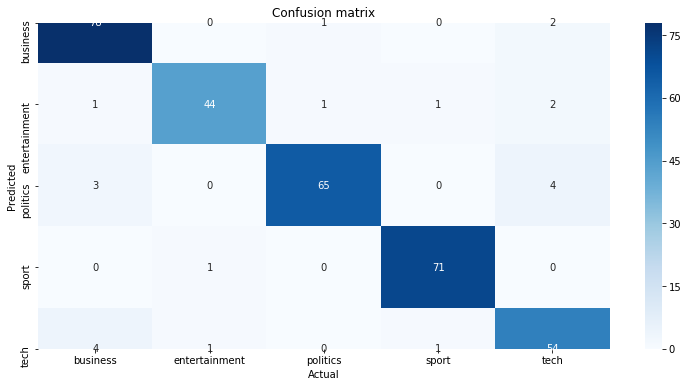

In [96]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [97]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9401197604790419

In [98]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9341317365269461

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf